## Modeling Exercises

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
np.set_printoptions(suppress = True)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mason_functions as mf
import scaler as sc
import sklearn.preprocessing

from pydataset import data
from sklearn.cluster import KMeans

### Exercise I
Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

* a. Choose features other than the ones used in the lesson.
* b. Visualize the results of your clustering.
* c. Use the elbow method to visually select a good value for k.
* d. Repeat the clustering, this time with 3 different features.

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
#select some features right quick
features = ['sepal_width', 'petal_width']

In [6]:
#assign X to the featured data
X = df[features]

In [7]:
#at a glance
X.head()

,sepal_width,petal_width
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2


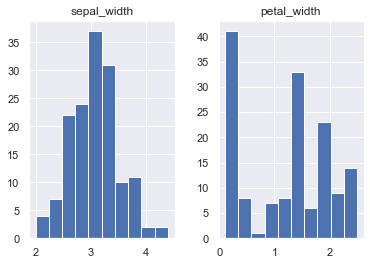

In [8]:
#distributions for X
X.hist();

In [9]:
#create scaler
scaler = sklearn.preprocessing.MinMaxScaler()

#fit scaler
scaler.fit(X)

#use the scaler
X_scaled = scaler.transform(X)

In [10]:
#assign columns to scaled data
df[['sepal_width_scaled', 'petal_width_scaled']] = X_scaled

In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_width_scaled,petal_width_scaled
0,5.1,3.5,1.4,0.2,setosa,0.625000,0.041667
1,4.9,3.0,1.4,0.2,setosa,0.416667,0.041667
2,4.7,3.2,1.3,0.2,setosa,0.500000,0.041667
3,4.6,3.1,1.5,0.2,setosa,0.458333,0.041667
4,5.0,3.6,1.4,0.2,setosa,0.666667,0.041667


In [12]:
#creation
kmeans = KMeans(n_clusters = 3, random_state = 421)

#fit it
kmeans.fit(X_scaled)

#use it
kmeans.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [13]:
#create column for clustering assingment
df['cluster'] = kmeans.predict(X_scaled)

In [14]:
#check it
df

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_width_scaled,petal_width_scaled,cluster
0,5.1,3.5,1.4,0.2,setosa,0.625000,0.041667,1
1,4.9,3.0,1.4,0.2,setosa,0.416667,0.041667,1
2,4.7,3.2,1.3,0.2,setosa,0.500000,0.041667,1
3,4.6,3.1,1.5,0.2,setosa,0.458333,0.041667,1
4,5.0,3.6,1.4,0.2,setosa,0.666667,0.041667,1
5,5.4,3.9,1.7,0.4,setosa,0.791667,0.125000,1
6,4.6,3.4,1.4,0.3,setosa,0.583333,0.083333,1
7,5.0,3.4,1.5,0.2,setosa,0.583333,0.041667,1
8,4.4,2.9,1.4,0.2,setosa,0.375000,0.041667,1
9,4.9,3.1,1.5,0.1,setosa,0.458333,0.000000,1


In [15]:
#check cluster centers
kmeans.cluster_centers_

array([[0.29481132, 0.50393082],
       [0.60459184, 0.06037415],
       [0.43402778, 0.81336806]])

In [16]:
#quick look at labels
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [17]:
#inertia
kmeans.inertia_

3.576804853066748

In [18]:
#unscaled centroids
scaler.inverse_transform(kmeans.cluster_centers_)

array([[2.70754717, 1.30943396],
       [3.45102041, 0.24489796],
       [3.04166667, 2.05208333]])

In [19]:
#make a dataframe
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = features)
centroids_scaled

,sepal_width,petal_width
0,0.294811,0.503931
1,0.604592,0.060374
2,0.434028,0.813368


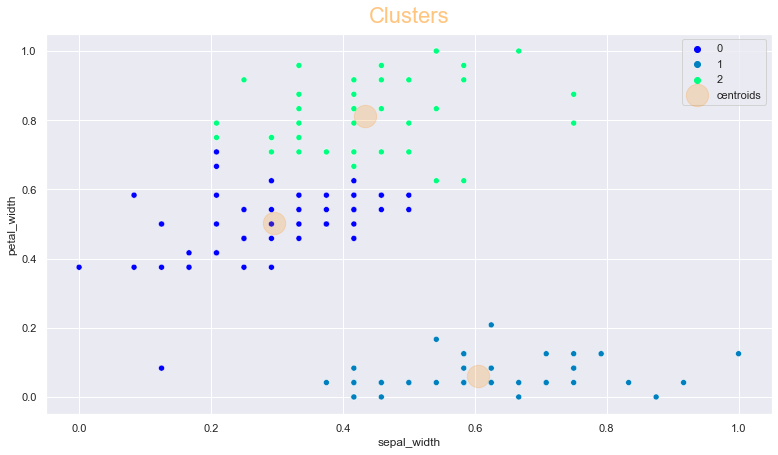

In [20]:
#create figure
plt.figure(figsize = (13, 7))

#scatterplot of features
sns.scatterplot(x = 'sepal_width_scaled', y = 'petal_width_scaled', data = df, hue = 'cluster', palette = 'winter')

#plot centroids
centroids_scaled.plot.scatter(x = 'sepal_width',
                              y = 'petal_width',
                              ax = plt.gca(),
                              s = 500,
                              alpha = .2,
                              color = 'darkorange',
                              label = 'centroids'
                             )

#clarity
plt.title('Clusters', size = 22, pad = 11, color = 'darkorange', alpha = .5)
plt.legend();

In [21]:
#get unscaled centroids
coordinates = scaler.inverse_transform(kmeans.cluster_centers_)
centroids = pd.DataFrame(coordinates, columns = features)

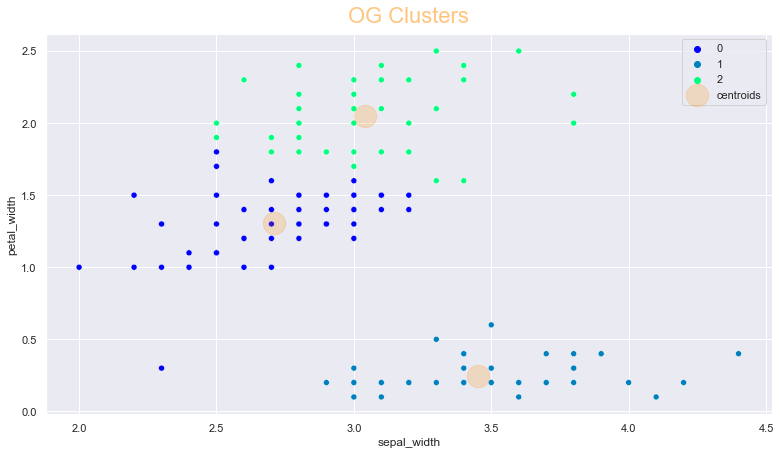

In [22]:
#create figure
plt.figure(figsize = (13, 7))

#plot clusters
sns.scatterplot(x = 'sepal_width', y = 'petal_width', data = df, hue = 'cluster', palette = 'winter')

#plot centroids
centroids.plot.scatter(x = 'sepal_width', y = 'petal_width',
                       ax = plt.gca(), 
                       s = 500,
                       alpha = .2,
                       color = 'darkorange',
                       label = 'centroids'
                      )

#clarity
plt.title('OG Clusters', size = 22, pad = 11, color = 'darkorange', alpha = .5)
plt.legend();

##### 

It's time to elbow the k

In [23]:
#refit kmeans object to two clusters
kmeans = KMeans(n_clusters = 2, random_state = 421)
kmeans.fit(X_scaled)
kmeans.predict(X_scaled)
kmeans.inertia_

6.321006944444447

In [24]:
#refit kmeans object to 4 clusters
kmeans = KMeans(n_clusters = 4, random_state = 421)
kmeans.fit(X_scaled)
kmeans.predict(X_scaled)
kmeans.inertia_

2.830364265390331

In [25]:
#refit kmeans object to 5 clusters
kmeans = KMeans(n_clusters = 5, random_state = 421)
kmeans.fit(X_scaled)
kmeans.predict(X_scaled)
kmeans.inertia_

2.1328984657653134

In [26]:
#just for giggles
kmeans = KMeans(n_clusters = 6, random_state = 421)
kmeans.fit(X_scaled)
kmeans.predict(X_scaled)
kmeans.inertia_

1.6338967626191891

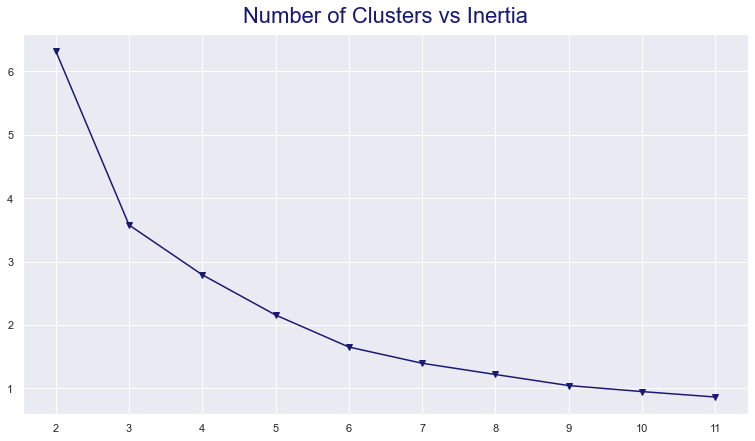

In [27]:
#create series to represent k number of clusters versus corresponding inertia
inertia = pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)})

#create figure
plt.figure(figsize = (13, 7))

#plot the series
inertia.plot(marker = 'v', color = 'midnightblue')

#clarity
plt.title('Number of Clusters vs Inertia', size = 22, pad = 11, color = 'midnightblue')
plt.xticks(range(2, 12))
plt.grid(True);

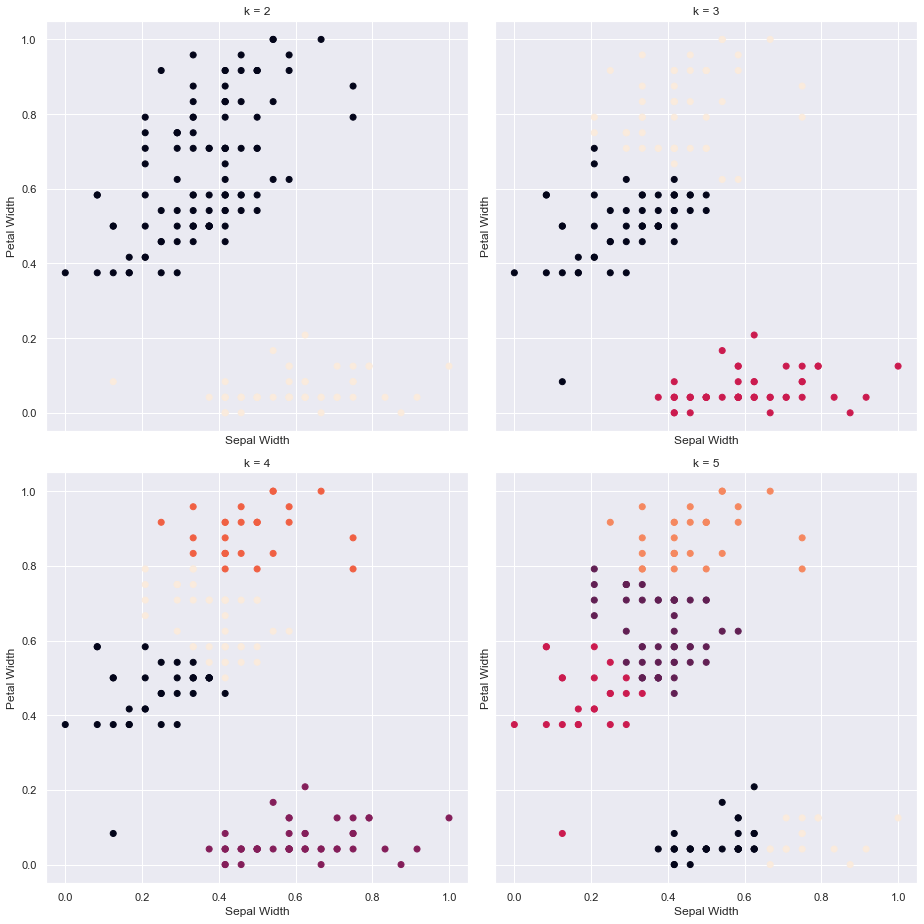

In [28]:
#create axes to plot data hued-in by cluster
fig, axs = plt.subplots(2, 2, figsize = (13, 13), sharex = True, sharey = True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(n_clusters = k, random_state = 421).fit(X_scaled).predict(X_scaled)
    ax.scatter(df.sepal_width_scaled, df.petal_width_scaled, c = clusters)
    ax.set(title = f'k = {k}', xlabel = 'Sepal Width', ylabel = 'Petal Width')
    plt.tight_layout();

In [29]:
inertia

2     6.321007
3     3.576805
4     2.790746
5     2.156735
6     1.651703
7     1.395732
8     1.218529
9     1.043771
10    0.948959
11    0.863370
dtype: float64

### Takeaways
* 3 clusters is the way to go with this data set

### Next Steps
* Let's try 3 features

In [30]:
#new df
df = sns.load_dataset('iris')

In [31]:
#set features to 3 personally selected
features = ['sepal_width', 'petal_length', 'petal_width']
X = df[features]

In [32]:
X.head()

,sepal_width,petal_length,petal_width
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2


In [33]:
#create scaler
scaler = sklearn.preprocessing.MinMaxScaler()

#fit scaler
scaler.fit(X)

#use scaler
X_scaled = scaler.transform(X)

In [34]:
#add scaled values to dataframe
df[['sepal_width_scaled', 'petal_length_scaled', 'petal_width_scaled']] = X_scaled

In [35]:
#create clustering object
kmeans = KMeans(n_clusters = 3, random_state = 421)

#fit it
kmeans.fit(X_scaled)

#use it
kmeans.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [36]:
#add column to dataframe
df['cluster'] = kmeans.predict(X_scaled)

#create dataframe of centroid data
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = features)

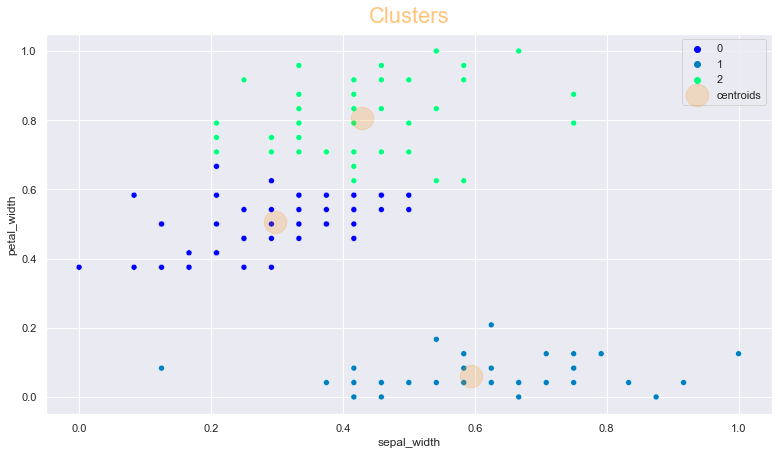

In [37]:
#create figure
plt.figure(figsize = (13, 7))

#scatterplot of features
sns.scatterplot(x = 'sepal_width_scaled', y = 'petal_width_scaled', data = df, hue = 'cluster', palette = 'winter')

#plot centroids
centroids_scaled.plot.scatter(x = 'sepal_width',
                              y = 'petal_width',
                              ax = plt.gca(),
                              s = 500,
                              alpha = .2,
                              color = 'darkorange',
                              label = 'centroids'
                             )

#clarity
plt.title('Clusters', size = 22, pad = 11, color = 'darkorange', alpha = .5)
plt.legend();

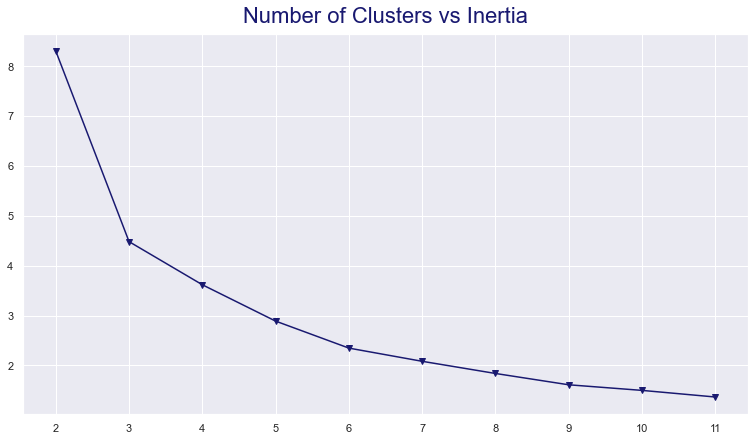

In [38]:
#create series to represent k number of clusters versus corresponding inertia
inertia = pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)})

#create figure
plt.figure(figsize = (13, 7))

#plot the series
inertia.plot(marker = 'v', color = 'midnightblue')

#clarity
plt.title('Number of Clusters vs Inertia', size = 22, pad = 11, color = 'midnightblue')
plt.xticks(range(2, 12))
plt.grid(True);

In [39]:
inertia

2     8.301880
3     4.481992
4     3.617962
5     2.889269
6     2.348131
7     2.083592
8     1.839736
9     1.612803
10    1.500593
11    1.367941
dtype: float64

### Exercise II
Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [40]:
#define sql query
sql = '''
SELECT * 
FROM customers
'''

#define url
url = mf.get_db_url('mall_customers')

#read sql to make a dataframe
mall = pd.read_sql(sql, url)

In [41]:
#grab first 5 observations for at-a-glance takeaways
mall.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [42]:
#set index to customer id or drop customer id column
mall = mall.set_index('customer_id')

In [43]:
mall.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [44]:
features = ['age', 'annual_income', 'spending_score']

In [45]:
train, validate, test = mf.split_data(mall)
train_scaled, validate_scaled, test_scaled, scaler = sc.max_min_scaler(train, validate, test, features)

### Exercise III 
How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.




### Bonus
a) Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing
b) Visualize the data and guess the number and shape of the clusters.
c) Implement the KMeans algorithm on unscaled data and visualize the clusters.
d) Repeat the step above but with scaled data. 
c) Write down the takeaways from this exercise.


